# **Máquinas suportadas por Vetor (SVM)**

As máquinas suportadas por vetor são métodos de aprendizado supervisionados que podem ser lineares ou não-lineares, dependendo das hipóteses utilizadas na sua construção.

São algoritmos de alta capacidade de aprendizado e de generalização, mesmo que a hipótese que os baseia seja muito simples. Isso se deve à sua elaborada construção matemática, que está fora do escopo dessa aula.

## **Classificadores de Margem**

Considere o seguinte dataset supervisionado de um problema de classificação binário:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

É visível que os dados são linearmente separáveis. De fato, existem infinitas retas possíveis que separam perfeitamente as duas classes.

Apesar disso (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Dependendo da inclinação da reta que escolhemos para separar as classes, o erro de generalização pode ser diferente. Precisamos ter um método que determine a melhor reta que garanta error de treinamento baixo, porém que isso não prejudique a classificação dos pontos futuros.

É aqui que entra o conceito de **margem**:

> Chamamos de **margem** a **menor distância** entre os pontos de treino e a fronteira de decisão

Intituivamente, um classificador de margem máxima terá mais chance de generalizar bem para futuros pontos, uma vez que apresenta uma "banda morta" que garante a separação máxima entre as classes.

> Chamamos de **classificador de margem máxima** um classificador **linear** que é construído de modo que a margem seja maximizada.


### **Classificador de Margem Suave**

Um classificador de margem máxima, apesar de ajudar a melhorar a generalização da separação, ele é limitado a dados linearmente separáveis. Além disso, possui grande variância, pois qualquer novo dado adicionado à base, modifica significativamente a posição da margem.

Uma possível saída é a utilização do conceito de *classificador de margem suave*. Um classificador de margem suave é aquele permite que pequenos erros sejam cometidos no momento do treinamento, pois considera que todos pontos que estão dentro da margem como *outliers*.

Esse procedimento é conhecido como *regularização*, que é como uma forma de forçar a simplificação do modelo para garantir que a variância do modelo não seja tão alta. Assim, permite-se um aumento do viés do modelo, em troca da diminuição da variância.

Esse classificador de **margem suave** também é conhecido como **classificador suportado por vetores**, onde esses vetores são os hiperplanos que limitam a margem.

Uma última informação importante a respeito dos classificadores de margem suave:

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

In [17]:
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV

# ignorar warnings
warnings.filterwarnings('ignore')

In [2]:
# montando drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# procurando arquivos no Drive
data = pd.read_csv('/content/drive/MyDrive/Bootcamp_DataScience/AlgoritmosInteligenciaArtificialClassificacao/datasets/german_credit.csv')
data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [7]:
# modificando os nomes das colunas
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')

In [8]:
data.head()

,creditability,account_balance,duration_of_credit_month,payment_status_of_previous_credit,purpose,credit_amount,value_savings/stocks,length_of_current_employment,instalment_per_cent,sex_&_marital_status,...,duration_in_current_address,most_valuable_available_asset,age_years,concurrent_credits,type_of_apartment,no_of_credits_at_this_bank,occupation,no_of_dependents,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [9]:
# separar em x e y
target = 'creditability'
x = data.drop([target], axis=1)
y = data[[target]]

In [10]:
# separando variáveis numéricas e categóricas
num = ['duration_of_credit_month', 'credit_amount', 'age_years', 'concurrent_credits',
       'length_of_current_employment', 'no_of_dependents']
cat = [col for col in x.columns if col not in num]

In [12]:
# separando treino e teste - com estratificação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [13]:
# criar um modelo baseline - hipótese: todos não devem receber crédito (todos = 0)
y_base = np.repeat(0, repeats=y_test.shape[0])
y_base

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# métricas do baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        90
           1       0.00      0.00      0.00       210

    accuracy                           0.30       300
   macro avg       0.15      0.50      0.23       300
weighted avg       0.09      0.30      0.14       300



In [15]:
# (extra) simular um teste de hipóteses (simplificado)
data[[target, 'credit_amount']].groupby(target).mean()

,credit_amount
creditability,
0,3938.126667
1,2985.442857


In [22]:
# criando um pipeline de processamento
preprocessor = ColumnTransformer([
    ('category', OneHotEncoder(drop='first'), cat),
    ('numeric', RobustScaler(), num)
])

# criando os pipelines
dt_categ = Pipeline([
    ('transformer', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('model', DecisionTreeClassifier(random_state=2))
])
reglog_categ = Pipeline([
    ('transformer', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('model', LogisticRegression(solver='saga'))
])
svc_categ = Pipeline([
    ('transformer', preprocessor),
    ('selector', SelectKBest(f_classif)),
    ('svc', SVC(random_state=2))
])

# configurar o espaço de busca
params_grid_dt = {
    'model__max_depth': range(2, 11),
    'model__criterion': ['gini', 'entropy'],
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}
params_grid_reglog = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.25, 0.5, 0.75],
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}
params_grid_svc = {
    'selector__k': range(1, 11)
}

# configurar o amostrador - estratificado
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [24]:
# configura um buscador aleatório - reglog
rs_reglog = RandomizedSearchCV(
    estimator=reglog_categ,
    param_distributions=params_grid_reglog,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)
# configura um buscador aleatório - dt
rs_dt = RandomizedSearchCV(
    estimator=dt_categ,
    param_distributions=params_grid_dt,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)
# configura um buscador aleatório - svm
rs_svc = RandomizedSearchCV(
    estimator=svc_categ,
    param_distributions=params_grid_svc,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)

In [25]:
# buscar os melhores parâmetros - Reg. Logística
rs_reglog.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10
[CV 1/10; 1/50] END model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10;, score=0.837 total time=   0.1s
[CV 2/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10
[CV 2/10; 1/50] END model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10;, score=0.723 total time=   0.1s
[CV 3/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10
[CV 3/10; 1/50] END model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None, selector__k=10;, score=0.699 total time=   0.1s
[CV 4/10; 1/50] START model__C=10, model__class_weight=balanced, model__l1_ratio=0.25, model__penalty=None

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('category',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['account_balance',
                                                                                'payment_status_of_previous_credit',
                                                                                'purpose',
                                                                                'value_savings/stocks',
                                                                                'instalment_per_cent',
                                                                                'sex_&_marital_status',
                                                                                'guarantors...
                                                                                'length_of_current_employment',
                                                                                'no_of_dependents'])])),
                                             ('selector', SelectKBest()),
                                             ('model',
                                              LogisticRegression(solver='saga'))]),
                   n_iter=50,
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1, 10],
                                        'model__class_weight': ['balanced',
                                                                None],
                                        'model__l1_ratio': [0.25, 0.5, 0.75],
                                        'model__penalty': ['l1', 'l2',
                                                           'elasticnet', None],
                                        'selector__k': range(1, 11)},
                   scoring='f1', verbose=10)

In [26]:
# buscar os melhores parâmetros - Árvore de Decisão
rs_dt.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10
[CV 1/10; 1/50] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10;, score=0.778 total time=   0.0s
[CV 2/10; 1/50] START model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10
[CV 2/10; 1/50] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10;, score=0.725 total time=   0.0s
[CV 3/10; 1/50] START model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10
[CV 3/10; 1/50] END model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10;, score=0.579 total time=   0.0s
[CV 4/10; 1/50] START model__class_weight=balanced, model__criterion=entropy, model__max_depth=6, selector__k=10
[CV 4/10; 1/50] END model__class_weight=balanced, mod

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('category',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['account_balance',
                                                                                'payment_status_of_previous_credit',
                                                                                'purpose',
                                                                                'value_savings/stocks',
                                                                                'instalment_per_cent',
                                                                                'sex_&_marital_status',
                                                                                'guarantors...
                                                                                'age_years',
                                                                                'concurrent_credits',
                                                                                'length_of_current_employment',
                                                                                'no_of_dependents'])])),
                                             ('selector', SelectKBest()),
                                             ('model',
                                              DecisionTreeClassifier(random_state=2))]),
                   n_iter=50,
                   param_distributions={'model__class_weight': ['balanced',
                                                                None],
                                        'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': range(2, 11),
                                        'selector__k': range(1, 11)},
                   scoring='f1', verbose=10)

In [27]:
# buscar os melhores parâmetros - SVC
rs_svc.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START selector__k=1.............................................
[CV 1/10; 1/10] END ..............selector__k=1;, score=0.824 total time=   0.2s
[CV 2/10; 1/10] START selector__k=1.............................................
[CV 2/10; 1/10] END ..............selector__k=1;, score=0.824 total time=   0.2s
[CV 3/10; 1/10] START selector__k=1.............................................
[CV 3/10; 1/10] END ..............selector__k=1;, score=0.824 total time=   0.2s
[CV 4/10; 1/10] START selector__k=1.............................................
[CV 4/10; 1/10] END ..............selector__k=1;, score=0.824 total time=   0.2s
[CV 5/10; 1/10] START selector__k=1.............................................
[CV 5/10; 1/10] END ..............selector__k=1;, score=0.824 total time=   0.3s
[CV 6/10; 1/10] START selector__k=1.............................................
[CV 6/10; 1/10] END ..............selector__k=

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('category',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['account_balance',
                                                                                'payment_status_of_previous_credit',
                                                                                'purpose',
                                                                                'value_savings/stocks',
                                                                                'instalment_per_cent',
                                                                                'sex_&_marital_status',
                                                                                'guarantors...
                                                                                'no_of_credits_at_this_bank',
                                                                                'occupation',
                                                                                'telephone',
                                                                                'foreign_worker']),
                                                                              ('numeric',
                                                                               RobustScaler(),
                                                                               ['duration_of_credit_month',
                                                                                'credit_amount',
                                                                                'age_years',
                                                                                'concurrent_credits',
                                                                                'length_of_current_employment',
                                                                                'no_of_dependents'])])),
                                             ('selector', SelectKBest()),
                                             ('svc', SVC(random_state=2))]),
                   n_iter=50, param_distributions={'selector__k': range(1, 11)},
                   scoring='f1', verbose=10)

In [28]:
# analisando melhores parâmetros
print('Regressão Logística')
print(rs_reglog.best_params_)
print()
# analisando melhores parâmetros
print('Arvore de Decisão')
print(rs_dt.best_params_)
print()
# analisando melhores parâmetros
print('SVC')
print(rs_svc.best_params_)
print()

Regressão Logística
{'selector__k': 8, 'model__penalty': None, 'model__l1_ratio': 0.75, 'model__class_weight': None, 'model__C': 0.01}

Arvore de Decisão
{'selector__k': 4, 'model__max_depth': 4, 'model__criterion': 'entropy', 'model__class_weight': None}

SVC
{'selector__k': 10}



In [29]:
# analisando melhores métricas médias
print('Regressão Logística')
print(rs_reglog.best_score_)
print()
# analisando melhores métricas médias
print('Arvore de Decisão')
print(rs_dt.best_score_)
print()
# analisando melhores métricas médias
print('SVC')
print(rs_svc.best_score_)
print()

Regressão Logística
0.8363651077929772

Arvore de Decisão
0.8292194408659885

SVC
0.838254276042916



In [32]:
def analyze_performance(model, y_train, y_test, x_train, x_test):
  yhat_train = model.predict(x_train)
  yhat_test = model.predict(x_test)

  print('Base de Treinamento')
  print(classification_report(y_train, yhat_train))
  print()
  print('Base de Teste')
  print(classification_report(y_test, yhat_test))
  print()

In [33]:
print('Regressão Logística')
analyze_performance(rs_reglog.best_estimator_, y_train, y_test, x_train, x_test)

print('Árvore de Decisão')
analyze_performance(rs_dt.best_estimator_, y_train, y_test, x_train, x_test)

print('SVC')
analyze_performance(rs_svc.best_estimator_, y_train, y_test, x_train, x_test)

Regressão Logística
Base de Treinamento
              precision    recall  f1-score   support

           0       0.65      0.39      0.49       210
           1       0.78      0.91      0.84       490

    accuracy                           0.75       700
   macro avg       0.71      0.65      0.66       700
weighted avg       0.74      0.75      0.73       700


Base de Teste
              precision    recall  f1-score   support

           0       0.59      0.26      0.36        90
           1       0.74      0.92      0.82       210

    accuracy                           0.72       300
   macro avg       0.67      0.59      0.59       300
weighted avg       0.70      0.72      0.68       300


Árvore de Decisão
Base de Treinamento
              precision    recall  f1-score   support

           0       0.71      0.33      0.45       210
           1       0.77      0.94      0.85       490

    accuracy                           0.76       700
   macro avg       0.74      0.64 

Mas o que acontece se o dataset não for linearmente separável? Nesse caso, não conseguiremos usar o classificador de margem suave. Pelo menos, **não no espaço original dos atributos.**

Mas e se conseguirmos aplicar alguma função que leve os dados para outro espaço de coordenadas de forma que, nesse novo espaço, os dados sejam linearmente separáveis? Então, nesse novo espaço de coordenadas, poderemos aplicar o SVM.

Essa combinação de uma nova função com a aplicação sequencial do SVM é conhecido como mapeamento de atributos (ou *feature map*) e constitui a origem dos modelos chamados *kernel SVM*.

## **Kernel SVM**

A função de kernel é, em resumo, a função não linear que vai levar os dados do espaço original (não linearmente separável) para o novo espaço, de tal forma que os dados sejam linearmente separáveis e, portanto, permitam a aplicação do classificador de margem suave.

As funções de kernel mais comum são:

- linear = SVM comum
- polinomial
- Radial Basis Function, também conhecido como "Kernel Gaussiano"
- Sigmoidal
- Cossenoidal

Essencialmente, a escolha da função de kernel se resume a uma busca de hiperparâmetros.

## **Outros Hiperparâmetros do Modelo SVM**

Outros hiperparâmetros importantes são:

- $C$ - é um parâmetro de regularização, relacionado com a "suavidade" da margem. Ele controla o tradeoff entre a complexidade da fronteira de decisão, e erros de classificação que são permitidos. Quanto **menor** o C, mais suave será a fronteira de decisão, pois mais erros de classificação são permitidos (isto é, a margem fica **mais larga**); quanto **maior** C, a tolerância a erros de classificação é menor (e a margem fica menos suave, mais complexa);

<img src="https://learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=500>

- `gamma`: define a influência que cada ponto tem na fronteira de decisão. É a "abertura" do kernel: quanto **maior** o gamma, a influência é de mais curto alcance, e vice-versa;

<img src="https://sgao323.gitbooks.io/artificial-intelligence-projects/content/assets/svm_gamma.png" width=400>

- `degree`: aplicado apenas ao kernel polinomial, pois representa o grau polinomial utilizado.

In [41]:
params_grid_svc = {
    'selector__k': range(1, 11),
    'svc__kernel': ['rbf', 'linear', 'sigmoid', 'cosine', 'poly'],
    'svc__C': np.random.uniform(0.01, 10, 50),
    'svc__gamma': np.random.uniform(0.001, 1, 50),
    'svc__degree': [2, 3],
    'svc__class_weight': ['balanced', None]
}

# configura um buscador aleatório - svm
rs_svc = RandomizedSearchCV(
    estimator=svc_categ,
    param_distributions=params_grid_svc,
    n_iter=50,
    scoring='f1',
    cv=splitter,
    refit=True,
    error_score=0,
    verbose=10
)

# buscar os melhores parâmetros - SVC
rs_svc.fit(x_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START selector__k=5, svc__C=2.585491024042129, svc__class_weight=balanced, svc__degree=2, svc__gamma=0.22315440832711314, svc__kernel=sigmoid
[CV 1/10; 1/50] END selector__k=5, svc__C=2.585491024042129, svc__class_weight=balanced, svc__degree=2, svc__gamma=0.22315440832711314, svc__kernel=sigmoid;, score=0.554 total time=   0.6s
[CV 2/10; 1/50] START selector__k=5, svc__C=2.585491024042129, svc__class_weight=balanced, svc__degree=2, svc__gamma=0.22315440832711314, svc__kernel=sigmoid
[CV 2/10; 1/50] END selector__k=5, svc__C=2.585491024042129, svc__class_weight=balanced, svc__degree=2, svc__gamma=0.22315440832711314, svc__kernel=sigmoid;, score=0.642 total time=   0.3s
[CV 3/10; 1/50] START selector__k=5, svc__C=2.585491024042129, svc__class_weight=balanced, svc__degree=2, svc__gamma=0.22315440832711314, svc__kernel=sigmoid
[CV 3/10; 1/50] END selector__k=5, svc__C=2.585491024042129, svc__class_weight=balanc

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('category',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['account_balance',
                                                                                'payment_status_of_previous_credit',
                                                                                'purpose',
                                                                                'value_savings/stocks',
                                                                                'instalment_per_cent',
                                                                                'sex_&_marital_status',
                                                                                'guarantors...
       0.19186304, 0.22315441, 0.50322946, 0.2629678 , 0.91380069,
       0.84055655, 0.17570608, 0.03161342, 0.74188611, 0.53911471,
       0.02627957, 0.30753897, 0.33935995, 0.75830235, 0.9027014 ,
       0.95674749, 0.34726545, 0.08251597, 0.9574846 , 0.98154656,
       0.09272175, 0.70255618, 0.88705665, 0.47569839, 0.62658365]),
                                        'svc__kernel': ['rbf', 'linear',
                                                        'sigmoid', 'cosine',
                                                        'poly']},
                   scoring='f1', verbose=10)

In [42]:
# analisando melhores parâmetros
print('Regressão Logística')
print(rs_reglog.best_params_)
print()
# analisando melhores parâmetros
print('Arvore de Decisão')
print(rs_dt.best_params_)
print()
# analisando melhores parâmetros
print('SVC')
print(rs_svc.best_params_)
print()

Regressão Logística
{'selector__k': 8, 'model__penalty': None, 'model__l1_ratio': 0.75, 'model__class_weight': None, 'model__C': 0.01}

Arvore de Decisão
{'selector__k': 4, 'model__max_depth': 4, 'model__criterion': 'entropy', 'model__class_weight': None}

SVC
{'svc__kernel': 'linear', 'svc__gamma': 0.4793172012804704, 'svc__degree': 3, 'svc__class_weight': None, 'svc__C': 8.581572800404835, 'selector__k': 10}



In [43]:
# analisando melhores métricas médias
print('Regressão Logística')
print(rs_reglog.best_score_)
print()
# analisando melhores métricas médias
print('Arvore de Decisão')
print(rs_dt.best_score_)
print()
# analisando melhores métricas médias
print('SVC')
print(rs_svc.best_score_)
print()

Regressão Logística
0.8363651077929772

Arvore de Decisão
0.8292194408659885

SVC
0.828959453070941



In [45]:
print('Regressão Logística')
analyze_performance(rs_reglog.best_estimator_, y_train, y_test, x_train, x_test)

print('Árvore de Decisão')
analyze_performance(rs_dt.best_estimator_, y_train, y_test, x_train, x_test)

print('SVC')
analyze_performance(rs_svc.best_estimator_, y_train, y_test, x_train, x_test)

Regressão Logística
Base de Treinamento
              precision    recall  f1-score   support

           0       0.65      0.39      0.49       210
           1       0.78      0.91      0.84       490

    accuracy                           0.75       700
   macro avg       0.71      0.65      0.66       700
weighted avg       0.74      0.75      0.73       700


Base de Teste
              precision    recall  f1-score   support

           0       0.59      0.26      0.36        90
           1       0.74      0.92      0.82       210

    accuracy                           0.72       300
   macro avg       0.67      0.59      0.59       300
weighted avg       0.70      0.72      0.68       300


Árvore de Decisão
Base de Treinamento
              precision    recall  f1-score   support

           0       0.71      0.33      0.45       210
           1       0.77      0.94      0.85       490

    accuracy                           0.76       700
   macro avg       0.74      0.64 

## Importância de Atributos

In [46]:
x_num  = x[num]

In [55]:
# criando os pipelines - apenas para aprendizado
dt_feat_imp = Pipeline([
    ('scaler', RobustScaler()),
    ('model', DecisionTreeClassifier(random_state=2))
])
reglog_feat_imp = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(solver='saga'))
])
svc_feat_imp = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', SVC(random_state=2, kernel='linear'))
])

In [56]:
# separando treino e teste - com estratificação
x_train, x_test, y_train, y_test = train_test_split(x_num, y, test_size=0.3, stratify=y)

In [57]:
# treinar os modelos
dt_feat_imp.fit(x_train, y_train)
reglog_feat_imp.fit(x_train, y_train)
svc_feat_imp.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('svc', SVC(kernel='linear', random_state=2))])

In [51]:
# analisar as importâncias de cada atributo
# para regressão logistica
reglog_feat_imp['model'].coef_

array([[-0.41922727, -0.0476069 ,  0.30457791,  0.38942624,  0.43128659,
        -0.11405037]])

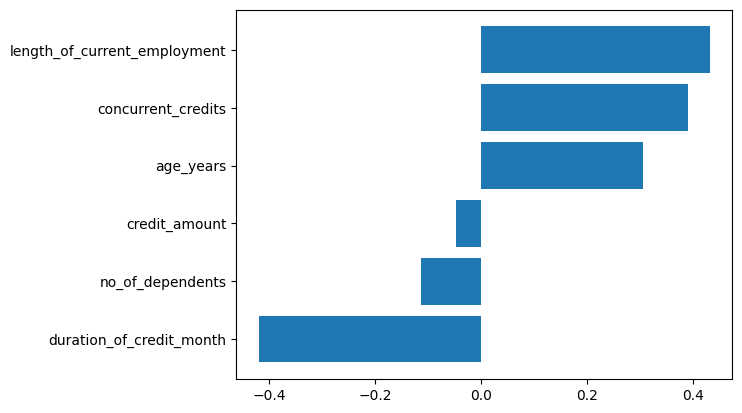

In [52]:
# criar um dataframe de importância de atributos
imp = pd.DataFrame(x_train.columns, columns=['atributos'])
imp['importancia'] = reglog_feat_imp['model'].coef_[0]
imp.sort_values(by='importancia', inplace=True)

# construindo gráfico
plt.barh(y=imp['atributos'], width=imp['importancia'])
plt.show()

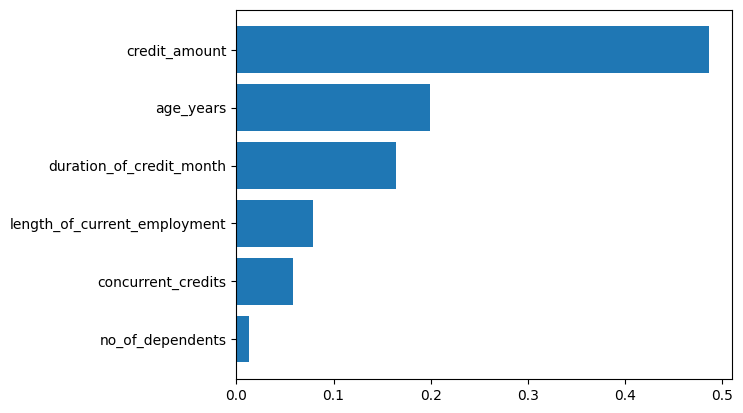

In [53]:
# criar um dataframe de importância de atributos
imp = pd.DataFrame(x_train.columns, columns=['atributos'])
imp['importancia'] = dt_feat_imp['model'].feature_importances_
imp.sort_values(by='importancia', inplace=True)

# construindo gráfico
plt.barh(y=imp['atributos'], width=imp['importancia'])
plt.show()

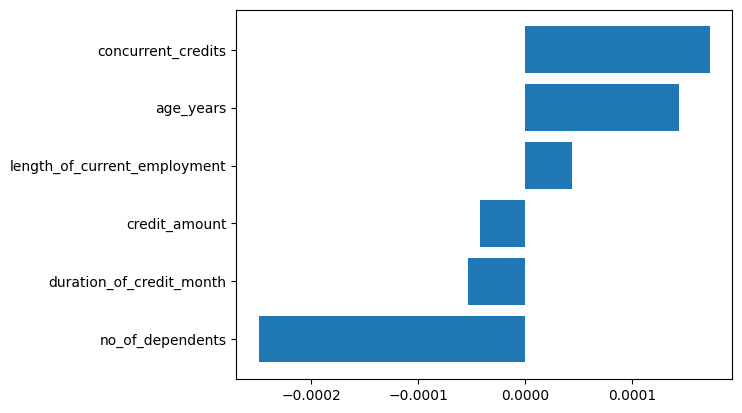

In [58]:
# criar um dataframe de importância de atributos
imp = pd.DataFrame(x_train.columns, columns=['atributos'])
imp['importancia'] = svc_feat_imp['svc'].coef_[0]
imp.sort_values(by='importancia', inplace=True)

# construindo gráfico
plt.barh(y=imp['atributos'], width=imp['importancia'])
plt.show()